In [1]:
import matplotlib.pyplot as plt 
import os 
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

## *1: Read Folders Path*

In [2]:
train_path='D:/Project AI/Vegetable Images/train'
test_path='D:/Project AI/Vegetable Images/test'
validation_path='D:/Project AI/Vegetable Images/validation'

In [3]:
# Return classes name 

class_name=os.listdir(train_path)
class_name

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

## *2: Visualization*

In [4]:
def plot_images(class_name):
    plt.figure(figsize=(20,20))
    for i ,category in enumerate(class_name) :
        image_path=train_path+'/'+category
        image_in_folder=os.listdir(image_path)
        
        first_image=image_in_folder[0]
        first_image_path=image_path+'/'+first_image
        
        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img)/255
        
        
        plt.subplot(4,4,i+1)
        plt.imshow(img_array)
        plt.title(category,fontsize=20)
        plt.axis('off')
    plt.show()

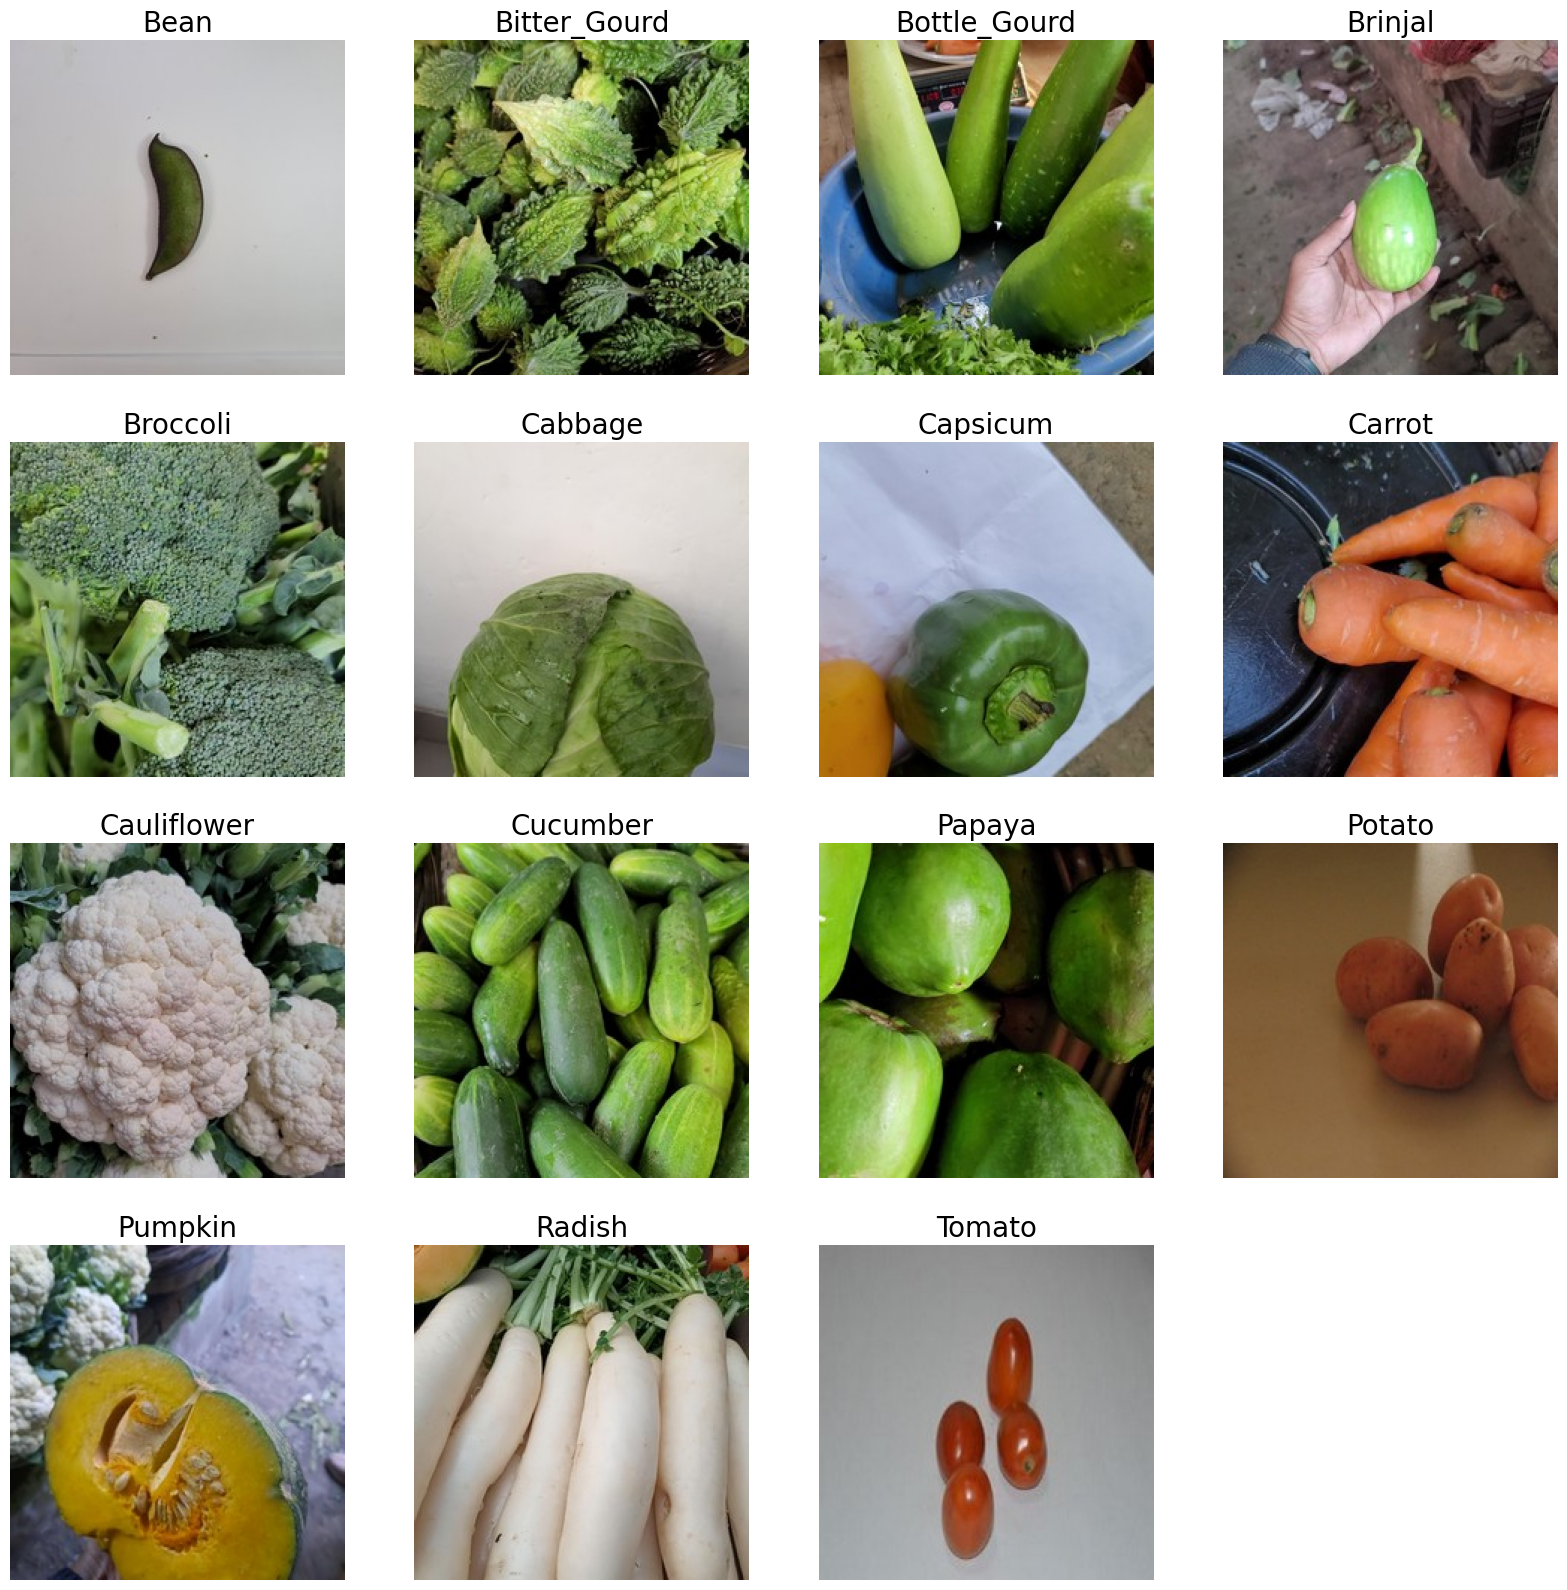

In [5]:
plot_images(class_name)

## *3: Data preprocessing*

In [6]:
data_generator=ImageDataGenerator(rescale=1/255)

In [7]:
train_data=data_generator.flow_from_directory(train_path
                                              ,target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

Found 15000 images belonging to 15 classes.


In [8]:
test_data=data_generator.flow_from_directory(test_path,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             shuffle=True)

Found 3000 images belonging to 15 classes.


In [9]:
validation_data=data_generator.flow_from_directory(validation_path,
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   shuffle=True,
                                                   target_size=(224,224))

Found 3000 images belonging to 15 classes.


## *4: Build cnn model*

In [10]:
model=Sequential()

In [11]:
# Add Layers into model

# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))

# Output Layer
model.add(Dense(15,activation='softmax'))


c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Fit Model

In [13]:
model_hist=model.fit(train_data,
                     validation_data=validation_data,epochs=5)

Epoch 1/5


c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 252ms/step - accuracy: 0.5006 - loss: 1.6642 - val_accuracy: 0.8693 - val_loss: 0.4377
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 263ms/step - accuracy: 0.9190 - loss: 0.2680 - val_accuracy: 0.8863 - val_loss: 0.3827
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 262ms/step - accuracy: 0.9741 - loss: 0.0921 - val_accuracy: 0.9310 - val_loss: 0.2618
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 239ms/step - accuracy: 0.9808 - loss: 0.0655 - val_accuracy: 0.9037 - val_loss: 0.4040
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 225ms/step - accuracy: 0.9892 - loss: 0.0385 - val_accuracy: 0.9317 - val_loss: 0.3019


## *Model Visualization*

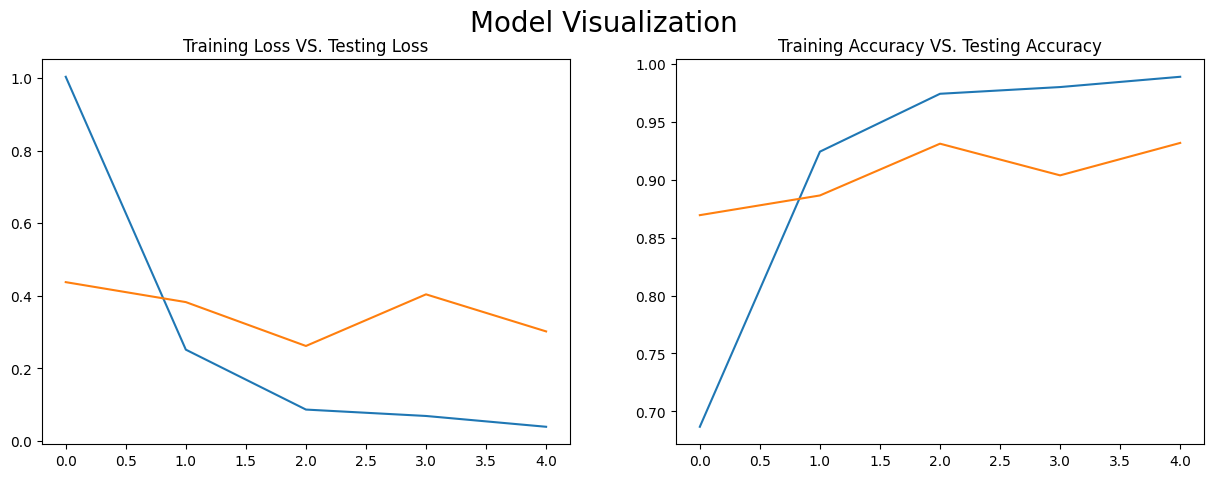

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Model Visualization",fontsize=20)
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()

## Model Evaluation 

In [19]:
# Train evaluation
model.evaluate(train_data)

469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9986 - loss: 0.0085


[0.007822899147868156, 0.9986666440963745]

In [20]:
# Test evaluation
model.evaluate(test_data)

 3/94 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9549 - loss: 0.1857

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9370 - loss: 0.2408


[0.28916656970977783, 0.9300000071525574]

## Save Model

In [ ]:
model.save("vegetable.h5")

## Load Model

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('vegetable.h5')